In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import ADASYN

### Read Source Data

In [3]:
patients = pd.read_csv('healthcare-dataset-stroke-data-preprocessed.csv')
patients.head(10)

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0.816895,0.0,1.0,1.0,0.801265,0.301260,0.500000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.743652,0.0,0.0,1.0,0.679023,0.219549,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.975586,0.0,1.0,1.0,0.234512,0.254296,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.597168,0.0,0.0,1.0,0.536008,0.276060,1.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.963379,1.0,0.0,1.0,0.549349,0.156930,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.987793,0.0,0.0,1.0,0.605161,0.214204,0.500000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0.902344,1.0,1.0,1.0,0.069107,0.195876,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.841309,0.0,0.0,0.0,0.181285,0.143184,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,0.719238,0.0,0.0,1.0,0.097082,0.197404,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.951172,0.0,0.0,1.0,0.015927,0.159221,0.500000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Data Unbalance

In [4]:
patients.stroke.value_counts()

0.0    4861
1.0     249
Name: stroke, dtype: int64

### Data Augmentation (ADASYN)

In [5]:
X = patients.drop(["stroke"], axis=1)
y = patients.stroke
adasyn = ADASYN(random_state=214, n_neighbors=5)
X_balance, y_balance = adasyn.fit_resample(X, y)

In [6]:
from collections import Counter
Counter(y_balance)

Counter({1.0: 4816, 0.0: 4861})

In [7]:
balanced_patients = pd.DataFrame(X, columns=X.columns)
balanced_patients["stroke"] = y_balance
balanced_patients.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,is_male,is_urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,stroke
0,0.816895,0.0,1.0,1.0,0.801265,0.301260,0.5,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.743652,0.0,0.0,1.0,0.679023,0.219549,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.975586,0.0,1.0,1.0,0.234512,0.254296,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.597168,0.0,0.0,1.0,0.536008,0.276060,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.963379,1.0,0.0,1.0,0.549349,0.156930,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [8]:
balanced_patients.to_csv('data-preprocessed-augmentation(ADASYN).csv', index=False)

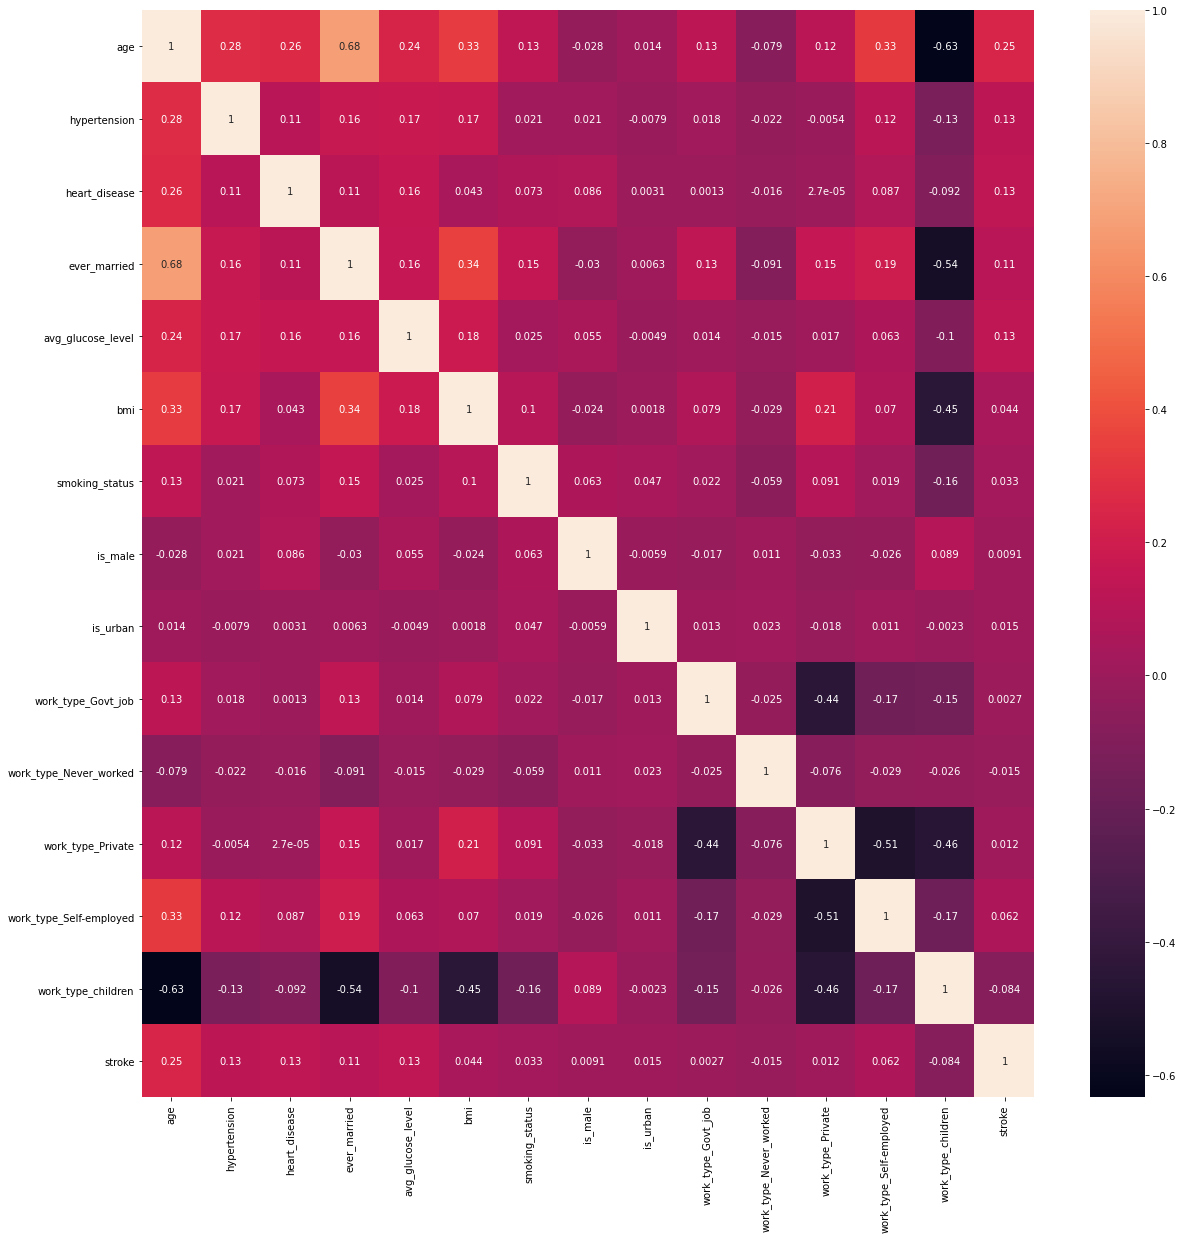

In [9]:
plt.figure(figsize=[20, 20])
hm = sb.heatmap(balanced_patients.corr(), annot=True)

In [10]:
figure = hm.get_figure()    
figure.savefig('conf-balanced.png', dpi=300)